<a href="https://colab.research.google.com/github/jv-mendes07/voos_do_brasil-2015-2017-/blob/main/Voos%20Do%20Brasil%20(2015-2017).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Análise Exploratória De Dados - Voos Do Brasil

In [ ]:
# Importação de bibliotecas que irão ser ferramentas auxiliares na análise.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# A atribuição do dataset para a variável 'df', seguível da leitura das cinco primeiras linhas do dataset.
df = pd.read_csv('/content/drive/MyDrive/Datasets/BrFlights2.csv', encoding = 'latin1')
df.head()

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,...,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig
0,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,2016-01-30T10:35:00Z,Realizado,NaN,Afonso Pena,...,PR,Brasil,Salgado Filho,Porto Alegre,RS,Brasil,-51.175381,-29.993473,-49.172481,-25.532713
1,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
2,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
3,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-19T12:13:00Z,2016-01-18T12:03:00Z,2016-01-19T21:30:00Z,2016-01-18T20:41:00Z,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
4,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473


# Visualizações iniciais, tratamento e limpeza dos dados.

In [ ]:
# Quantidade de linhas e colunas do dataset.
df.shape

(2542519, 21)

In [ ]:
# Informações gerais do conjunto de dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542519 entries, 0 to 2542518
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Voos                  object 
 1   Companhia.Aerea       object 
 2   Codigo.Tipo.Linha     object 
 3   Partida.Prevista      object 
 4   Partida.Real          object 
 5   Chegada.Prevista      object 
 6   Chegada.Real          object 
 7   Situacao.Voo          object 
 8   Codigo.Justificativa  object 
 9   Aeroporto.Origem      object 
 10  Cidade.Origem         object 
 11  Estado.Origem         object 
 12  Pais.Origem           object 
 13  Aeroporto.Destino     object 
 14  Cidade.Destino        object 
 15  Estado.Destino        object 
 16  Pais.Destino          object 
 17  LongDest              float64
 18  LatDest               float64
 19  LongOrig              float64
 20  LatOrig               float64
dtypes: float64(4), object(17)
memory usage: 407.4+ MB


In [ ]:
# Transposição do dataset em que as linhas serão transformáveis em colunas e inversamente as colunas em linhas.
df.T

,0,1,2,3,4,5,6,7,8,9,...,2542509,2542510,2542511,2542512,2542513,2542514,2542515,2542516,2542517,2542518
Voos,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,AAL - 203,...,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129,UAL - 129
Companhia.Aerea,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,AMERICAN AIRLINES INC,...,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES,UNITED AIRLINES
Codigo.Tipo.Linha,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,...,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional,Internacional
Partida.Prevista,2016-01-30T08:58:00Z,2016-01-13T12:13:00Z,2016-01-29T12:13:00Z,2016-01-19T12:13:00Z,2016-01-30T12:13:00Z,2016-01-03T23:05:00Z,2016-01-05T23:05:00Z,2016-01-18T12:13:00Z,2016-01-22T23:05:00Z,2016-01-15T23:05:00Z,...,2015-12-15T01:25:00Z,2015-12-28T01:25:00Z,2015-12-22T01:25:00Z,2015-12-30T01:25:00Z,2015-12-17T01:25:00Z,2015-12-14T01:25:00Z,2015-12-01T01:25:00Z,2015-12-27T01:25:00Z,2015-12-05T01:25:00Z,2015-12-09T01:25:00Z
Partida.Real,2016-01-30T08:58:00Z,2016-01-13T12:13:00Z,2016-01-29T12:13:00Z,2016-01-18T12:03:00Z,2016-01-30T12:13:00Z,2016-01-03T23:05:00Z,2016-01-05T23:35:00Z,2016-01-18T13:09:00Z,2016-01-22T23:05:00Z,2016-01-15T23:55:00Z,...,2015-12-15T01:25:00Z,2015-12-28T03:00:00Z,2015-12-22T02:07:00Z,2015-12-30T01:25:00Z,2015-12-17T02:02:00Z,2015-12-14T04:31:00Z,2015-12-01T01:25:00Z,2015-12-27T01:25:00Z,2015-12-05T01:21:00Z,2015-12-09T01:25:00Z
Chegada.Prevista,2016-01-30T10:35:00Z,2016-01-13T21:30:00Z,2016-01-29T21:30:00Z,2016-01-19T21:30:00Z,2016-01-30T21:30:00Z,2016-01-04T07:50:00Z,2016-01-06T07:50:00Z,2016-01-18T21:30:00Z,2016-01-23T07:50:00Z,2016-01-16T07:50:00Z,...,2015-12-15T11:19:00Z,2015-12-28T11:19:00Z,2015-12-22T11:19:00Z,2015-12-30T11:19:00Z,2015-12-17T11:19:00Z,2015-12-14T11:19:00Z,2015-12-01T11:19:00Z,2015-12-27T11:19:00Z,2015-12-05T11:19:00Z,2015-12-09T11:19:00Z
Chegada.Real,2016-01-30T10:35:00Z,2016-01-13T21:30:00Z,2016-01-29T21:30:00Z,2016-01-18T20:41:00Z,2016-01-30T21:30:00Z,2016-01-04T07:50:00Z,2016-01-06T08:35:00Z,2016-01-18T22:24:00Z,2016-01-23T07:50:00Z,2016-01-16T08:28:00Z,...,2015-12-15T11:19:00Z,2015-12-28T13:58:00Z,2015-12-22T11:49:00Z,2015-12-30T11:19:00Z,2015-12-17T11:38:00Z,2015-12-14T14:18:00Z,2015-12-01T11:19:00Z,2015-12-27T11:19:00Z,2015-12-05T10:48:00Z,2015-12-09T11:19:00Z
Situacao.Voo,Realizado,Realizado,Realizado,Realizado,Realizado,Realizado,Realizado,Realizado,Realizado,Realizado,...,Realizado,Realizado,Realizado,Realizado,Realizado,Realizado,Realizado,Realizado,Realizado,Realizado
Codigo.Justificativa,NaN,NaN,NaN,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,NaN,NaN,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,CONEXAO DE AERONAVE,NaN,ATRASOS NAO ESPECIFICOS - OUTROS,...,NaN,ATRASOS NAO ESPECIFICOS - OUTROS,ATRASOS NAO ESPECIFICOS - OUTROS,NaN,ATRASOS NAO ESPECIFICOS - OUTROS,ATRASOS NAO ESPECIFICOS - OUTROS,NaN,NaN,ATRASOS NAO ESPECIFICOS - OUTROS,NaN
Aeroporto.Origem,Afonso Pena,Salgado Filho,Salgado Filho,Salgado Filho,Salgado Filho,Miami,Miami,Salgado Filho,Miami,Miami,...,Houston,Houston,Houston,Houston,Houston,Houston,Houston,Houston,Houston,Houston


In [ ]:
# Alteração do nome das colunas, simplesmente para que os nomes estejam mais fáceis para a utilização digitacional.
df.columns = ['voos', 'comp_aerea', 'tp_voo', 'dt_part_prev',
       'dt_part_real', 'dt_cheg_prev', 'dt_cheg_real', 'situacao',
       'justificativa', 'aero_origem', 'city_origem',
       'uf_origem', 'pais_origem', 'aero_destino', 'city_destino',
       'uf_destino', 'pais_destino', 'long_destino', 'lat_destino', 'long_origem',
       'lat_origem']
# Visualização da mudança nominal das colunas.
df.columns

Index(['voos', 'comp_aerea', 'tp_voo', 'dt_part_prev', 'dt_part_real',
       'dt_cheg_prev', 'dt_cheg_real', 'situacao', 'justificativa',
       'aero_origem', 'city_origem', 'uf_origem', 'pais_origem',
       'aero_destino', 'city_destino', 'uf_destino', 'pais_destino',
       'long_destino', 'lat_destino', 'long_origem', 'lat_origem'],
      dtype='object')

In [ ]:
# Verificação do tipo de dados das colunas de data
print(df[['dt_part_prev', 'dt_cheg_prev', 'dt_part_real', 'dt_cheg_real']].dtypes)

dt_part_prev    object
dt_cheg_prev    object
dt_part_real    object
dt_cheg_real    object
dtype: object


In [ ]:
# Exemplo simplório de conversão com a primeira data da coluna de partida prévia 
# Antes:
print(df['dt_part_prev'][0])
# Depois:
pd.to_datetime(df['dt_part_prev'][0]).strftime('%Y-%m-%d %H:%M')

2016-01-30T08:58:00Z


'2016-01-30 08:58'

In [ ]:
# Conversão das colunas de data de tipo object para datetime.
df['dt_part_prev'] = pd.to_datetime(df['dt_part_prev']).dt.strftime('%Y-%m-%d %H:%M').astype('datetime64[ns]')
df['dt_part_real'] = pd.to_datetime(df['dt_part_real']).dt.strftime('%Y-%m-%d %H:%M').astype('datetime64[ns]')
df['dt_cheg_prev'] = pd.to_datetime(df['dt_cheg_prev']).dt.strftime('%Y-%m-%d %H:%M').astype('datetime64[ns]')
df['dt_cheg_real'] = pd.to_datetime(df['dt_cheg_real']).dt.strftime('%Y-%m-%d %H:%M').astype('datetime64[ns]')

In [ ]:
# Verificação da quantidade de valores únicos da coluna 'situacao'
df['situacao'].nunique()

2

In [ ]:
# Verificação dos valores únicos da coluna 'situacao'
df['situacao'].unique()

array(['Realizado', 'Cancelado'], dtype=object)

In [ ]:
# Alteração dos valores únicos para 0's e 1's como representações de voos cancelados (0) e realizados (1)
# Possibilidade alternativa de como realizar o mesmo objetivo:
df['situacao'].apply(lambda x : x.replace('Realizado', '1').replace('Cancelado', '0')).astype(int)

0          1
1          1
2          1
3          1
4          1
          ..
2542514    1
2542515    1
2542516    1
2542517    1
2542518    1
Name: situacao, Length: 2542519, dtype: int64

In [ ]:
# np.where para alterar os valores únicos para 0's e 1's
df['situacao'] = np.where(df['situacao'] == 'Realizado', 1, 0)
df['situacao']

0          1
1          1
2          1
3          1
4          1
          ..
2542514    1
2542515    1
2542516    1
2542517    1
2542518    1
Name: situacao, Length: 2542519, dtype: int64

In [ ]:
# Revisão da modificação do tipo de dados das colunas
df.dtypes

voos                     object
comp_aerea               object
tp_voo                   object
dt_part_prev     datetime64[ns]
dt_part_real     datetime64[ns]
dt_cheg_prev     datetime64[ns]
dt_cheg_real     datetime64[ns]
situacao                  int64
justificativa            object
aero_origem              object
city_origem              object
uf_origem                object
pais_origem              object
aero_destino             object
city_destino             object
uf_destino               object
pais_destino             object
long_destino            float64
lat_destino             float64
long_origem             float64
lat_origem              float64
dtype: object

In [ ]:
# Verificação quantitativa de dados nulos nas colunas
df.isnull().sum()

voos                   0
comp_aerea             0
tp_voo                 0
dt_part_prev           0
dt_part_real      289196
dt_cheg_prev           0
dt_cheg_real      289196
situacao               0
justificativa    1510212
aero_origem            0
city_origem            0
uf_origem              0
pais_origem            0
aero_destino           0
city_destino           0
uf_destino             0
pais_destino           0
long_destino           0
lat_destino            0
long_origem            0
lat_origem             0
dtype: int64

#### 1 - Os dados faltantes nas colunas de data de partida e chegada real são dados faltantes de voos realizados ou cancelados?

In [ ]:
# Filtro dos dados nulos nas duas colunas juntamente com a visualização de quais são os valores únicos da coluna 'situacao' desse filtro
df[df['dt_part_real'].isnull()].situacao.unique()

array([0])

In [ ]:
df[df['dt_cheg_real'].isnull()].situacao.unique()

array([0])

#### Resposta de 1 - Os dados faltantes de ambas as colunas são exclusivamente dados de voos cancelados, e logicamente como os voos foram cancelados, então os voos não tiveram data e horário de partida e chegada real justamente pelos voos não terem sido ocorríveis.

# Exploração e análise informacional dos dados.

#### 2 - Qual é a quantidade de voos por ano e por mês?

In [ ]:
# Mais uma verificação informacional generalizada dos dados de cada coluna para sabermos de antemão as colunas que serão selecionadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542519 entries, 0 to 2542518
Data columns (total 21 columns):
 #   Column         Dtype         
---  ------         -----         
 0   voos           object        
 1   comp_aerea     object        
 2   tp_voo         object        
 3   dt_part_prev   datetime64[ns]
 4   dt_part_real   datetime64[ns]
 5   dt_cheg_prev   datetime64[ns]
 6   dt_cheg_real   datetime64[ns]
 7   situacao       int64         
 8   justificativa  object        
 9   aero_origem    object        
 10  city_origem    object        
 11  uf_origem      object        
 12  pais_origem    object        
 13  aero_destino   object        
 14  city_destino   object        
 15  uf_destino     object        
 16  pais_destino   object        
 17  long_destino   float64       
 18  lat_destino    float64       
 19  long_origem    float64       
 20  lat_origem     float64       
dtypes: datetime64[ns](4), float64(4), int64(1), object(12)
memory usage: 407.4+ M

In [ ]:
# Como saber os anos periódicos de voos ocorrentes:
df['dt_part_real'].dt.year.unique()

array([2016.,   nan, 2015., 2017., 2014.])

In [ ]:
# Como saber os meses periódicos de voos ocorrentes:
df['dt_part_real'].dt.month.unique()

array([ 1.,  2., nan, 12.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [ ]:
# Quantidade de voos por ano
df.groupby(df['dt_part_real'].dt.year).agg({'voos': np.count_nonzero}).reset_index()

,dt_part_real,voos
0,2014.0,4
1,2015.0,941607
2,2016.0,834426
3,2017.0,477286


In [ ]:
# Verificação dos indíces de voos no ano de 2014
df[df['dt_part_real'].dt.year == 2014].index

Int64Index([1455251, 1459235, 1464809, 1496211], dtype='int64')

In [ ]:
# Remoção das linhas de voos de 2014, justamente por ser uma quantidade ínfima de voos que são desimportantes para a análise
df.drop(labels = [1455251, 1459235, 1464809, 1496211], inplace = True)
# Verifição de que tal ano foi eliminado:
df['dt_part_real'].dt.year.unique()

array([2016.,   nan, 2015., 2017.])

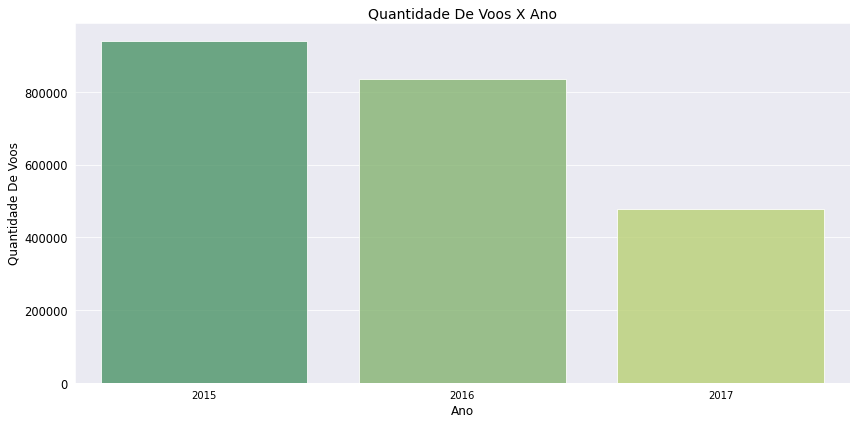

In [ ]:
# Plotagem gráfica da quantidade de voos por ano
sns.set_style('darkgrid')

ax = sns.barplot(data = df.groupby(df['dt_part_real'].dt.year).agg({'voos': 'size'}).reset_index(), 
                 x = 'dt_part_real', 
                 y = 'voos', 
                 alpha = 0.8, palette = 'summer')
ax.figure.set_size_inches((12, 6))
ax.set_xlabel('Ano', fontsize = 12, color = 'k')
ax.set_ylabel('Quantidade De Voos', fontsize = 12, color = 'k')
ax.set_xticklabels(labels = [2015, 2016, 2017], color = 'k', fontsize = 10)
ax.set_title('Quantidade De Voos X Ano', fontsize = 14, color = 'k')
ax.set_yticklabels([0, 200000, 400000, 600000, 800000], fontsize = 11.5, color = 'k')
plt.tight_layout();

In [ ]:
# Revisão novamente da quantidade de voos por ano
df.groupby(df['dt_part_real'].dt.year).agg({'voos': np.count_nonzero}).reset_index()

,dt_part_real,voos
0,2015.0,941607
1,2016.0,834426
2,2017.0,477286


In [ ]:
# Verificação prévia da quantidade de meses da data de voos para evitar quaisquer erros de dados anteriores
df['dt_part_real'].dt.month.nunique()

12

In [ ]:
# Verificação da quantidade de voos por mês em todos os anos
df.groupby(df['dt_part_real'].dt.month).agg({'voos': np.count_nonzero})

,voos
dt_part_real,
1.0,233409
2.0,207676
3.0,221707
4.0,207515
5.0,215487
6.0,207652
7.0,220663
8.0,148792
9.0,145213


In [ ]:
# Verificação da quantidade de voos por cada mês de cada ano separadamente
df.assign(ano = df['dt_part_real'].dt.year,
          mes = df['dt_part_real'].dt.month).groupby(['ano', 'mes']).agg({'voos': np.count_nonzero}).reset_index()

,ano,mes,voos
0,2015.0,1.0,83712
1,2015.0,2.0,74501
2,2015.0,3.0,80415
3,2015.0,4.0,75942
4,2015.0,5.0,77886
5,2015.0,6.0,75687
6,2015.0,7.0,81651
7,2015.0,8.0,79230
8,2015.0,9.0,76499
9,2015.0,10.0,78769


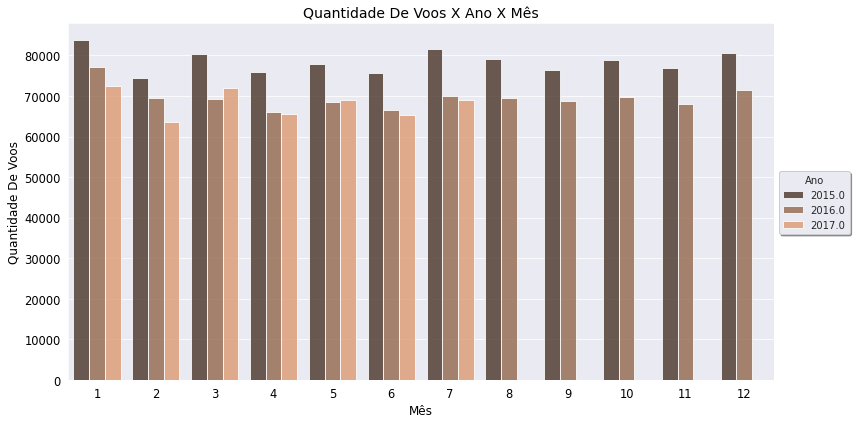

In [ ]:
# Plotagem gráfica da quantidade de voos por mês e ano
ax = sns.barplot(
  data = df.assign(ano = df['dt_part_real'].dt.year,
                   mes = df['dt_part_real'].dt.month).groupby(['ano', 'mes']).agg({'voos': np.count_nonzero}).reset_index(),
  x = 'mes',
  hue = 'ano',
  y = 'voos',
  alpha = 0.8,
  palette = 'copper'
)
ax.figure.set_size_inches((12, 6))
ax.set_xlabel('Mês', fontsize = 12, color = 'k')
ax.set_ylabel('Quantidade De Voos', fontsize = 12, color = 'k')
plt.legend(title = 'Ano', bbox_to_anchor = (1.0, 0.6), shadow = True)
ax.set_title('Quantidade De Voos X Ano X Mês', fontsize = 14, color = 'k')
ax.set_yticklabels([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000], fontsize = 11.5, color = 'k')
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], fontsize = 11.5, color = 'k')
plt.tight_layout();

In [ ]:
# Como visualizar o nome dos meses:
df['dt_part_real'].dt.month_name().unique()

array(['January', 'February', nan, 'December', 'March', 'April', 'May',
       'June', 'July', 'August', 'September', 'October', 'November'],
      dtype=object)

In [ ]:
# Como abreviar o nome dos meses:
df['dt_part_real'].dt.strftime('%b').unique()

array(['Jan', 'Feb', nan, 'Dec', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov'], dtype=object)

In [ ]:
# Abreviação do nomes dos meses:
df.assign(ano = df['dt_part_real'].dt.year,
          mes = df['dt_part_real'].dt.strftime('%b'),
          mes_ordem = df['dt_part_real'].dt.month).groupby(['ano', 'mes', 'mes_ordem']).agg(
              {'voos': np.count_nonzero}).reset_index().sort_values('mes_ordem')

,ano,mes,mes_ordem,voos
27,2017.0,Jan,1.0,72478
4,2015.0,Jan,1.0,83712
16,2016.0,Jan,1.0,77219
15,2016.0,Feb,2.0,69560
26,2017.0,Feb,2.0,63615
3,2015.0,Feb,2.0,74501
19,2016.0,Mar,3.0,69245
7,2015.0,Mar,3.0,80415
30,2017.0,Mar,3.0,72047
24,2017.0,Apr,4.0,65606


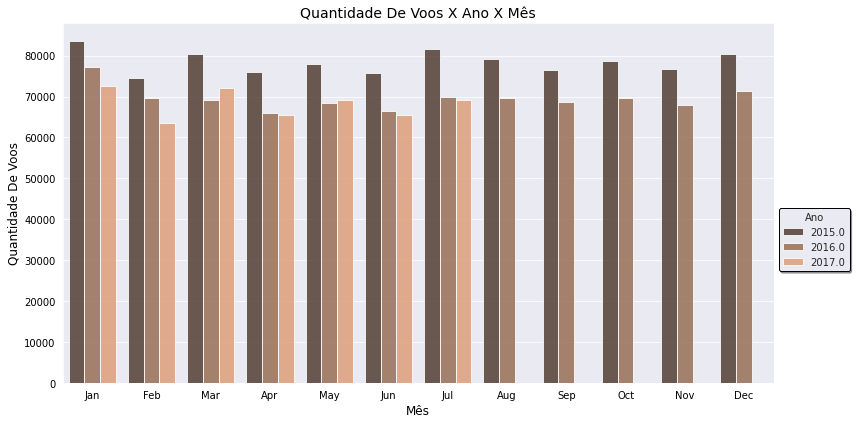

In [ ]:
# Quantidade de voos por mês de cada ano (com o nome dos meses abreviado)
ax = sns.barplot(data = df.assign(ano = df['dt_part_real'].dt.year,
          mes = df['dt_part_real'].dt.strftime('%b'),
          mes_ordem = df['dt_part_real'].dt.month).groupby(['ano', 'mes', 'mes_ordem']).agg(
              {'voos': np.count_nonzero}).reset_index().sort_values('mes_ordem'),
          x = 'mes', y = 'voos', hue = 'ano', alpha = 0.8, palette = 'copper')
ax.figure.set_size_inches((12, 6))
ax.set_xlabel('Mês', fontsize = 12, color = 'k')
ax.set_ylabel('Quantidade De Voos', fontsize = 12, color = 'k')
ax.set_title('Quantidade De Voos X Ano X Mês', fontsize = 14, color = 'k')
ax.set_xticklabels(labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], color = 'k',
                   fontsize = 10)
plt.legend(bbox_to_anchor = (1.0, 0.5), title = 'Ano', edgecolor = 'k', shadow = True)
ax.set_yticklabels([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000], fontsize = 10, color = 'k')
plt.tight_layout()
ax;

#### 03 - Qual é a quantidade de voos por data?

In [ ]:
# Verificação prévia dos voos reais pela data
df.loc[:, ['dt_part_real', 'voos']]

,dt_part_real,voos
0,2016-01-30 08:58:00,AAL - 203
1,2016-01-13 12:13:00,AAL - 203
2,2016-01-29 12:13:00,AAL - 203
3,2016-01-18 12:03:00,AAL - 203
4,2016-01-30 12:13:00,AAL - 203
...,...,...
2542514,2015-12-14 04:31:00,UAL - 129
2542515,2015-12-01 01:25:00,UAL - 129
2542516,2015-12-27 01:25:00,UAL - 129
2542517,2015-12-05 01:21:00,UAL - 129


In [ ]:
# Atribuição do dataframe anterior à uma nova variavel para facilitar na visualização gráfica:
df_2 = df.loc[:, ['dt_part_real', 'voos']]
print(df_2.shape)
df_2.head()

(2542515, 2)


,dt_part_real,voos
0,2016-01-30 08:58:00,AAL - 203
1,2016-01-13 12:13:00,AAL - 203
2,2016-01-29 12:13:00,AAL - 203
3,2016-01-18 12:03:00,AAL - 203
4,2016-01-30 12:13:00,AAL - 203


In [ ]:
# Obter a data sem os horários e atribui-los para uma nova coluna:
df_2['dt'] = df_2['dt_part_real'].dt.strftime('%Y-%m-%d').astype('datetime64[ns]')
df_2.head()

,dt_part_real,voos,dt
0,2016-01-30 08:58:00,AAL - 203,2016-01-30
1,2016-01-13 12:13:00,AAL - 203,2016-01-13
2,2016-01-29 12:13:00,AAL - 203,2016-01-29
3,2016-01-18 12:03:00,AAL - 203,2016-01-18
4,2016-01-30 12:13:00,AAL - 203,2016-01-30


In [ ]:
# Agrupamento da quantidade de voos pela data:
df_2.groupby('dt').agg({'voos': np.count_nonzero}).reset_index()

,dt,voos
0,2015-01-01,2261
1,2015-01-02,2606
2,2015-01-03,2286
3,2015-01-04,2474
4,2015-01-05,2906
...,...,...
939,2017-07-28,2380
940,2017-07-29,1854
941,2017-07-30,2087
942,2017-07-31,2428


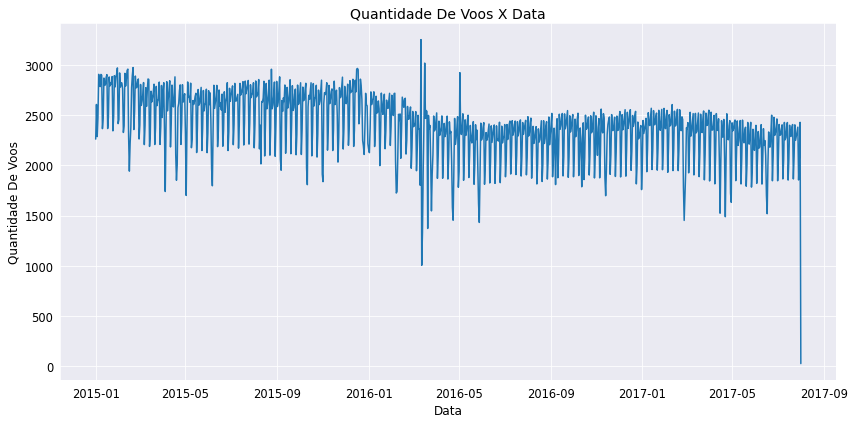

In [ ]:
# Gráfico de linha da quantidade de voos por data:
ax = sns.lineplot(data = df_2.groupby('dt').agg({'voos':np.count_nonzero}).reset_index(),
                  x = 'dt',
                  y = 'voos')
ax.figure.set_size_inches((12, 6))
ax.set_ylabel('Quantidade De Voos', fontsize = 12, color = 'k')
ax.set_xlabel('Data', fontsize = 12, color = 'k')
ax.set_title('Quantidade De Voos X Data', fontsize = 14, color = 'k')
ax.set_yticklabels([0, 0, 500, 1000, 1500, 2000, 2500, 3000], fontsize = 11.5, color = 'k')
ax.set_xticklabels(['2015-01', '2015-05', '2015-09', '2016-01',
                    '2016-05', '2016-09', '2017-01', '2017-05',
                    '2017-09'], fontsize = 11.5, color = 'k')
plt.tight_layout();

In [ ]:
# Agrupamento da quantidade de voos no mês de Julho de 2015
df_2[(df_2['dt'] >= '2015-07-01') & (df_2['dt'] <= '2015-07-31')].groupby('dt').agg({'voos':np.count_nonzero}).reset_index()

,dt,voos
0,2015-07-01,2700
1,2015-07-02,2730
2,2015-07-03,2791
3,2015-07-04,2205
4,2015-07-05,2406
5,2015-07-06,2816
6,2015-07-07,2641
7,2015-07-08,2641
8,2015-07-09,2675
9,2015-07-10,2707


In [ ]:
# Formatar as datas do gráfico de linha no eixo x:
pd.date_range(start = '2015-07-01', end = '2015-08-01')
x1 = ['2015-07-01', '2015-07-05', '2015-07-09', '2015-07-13',
      '2015-07-17', '2015-07-21', '2015-07-25', '2015-07-29', '2015-08-01']
pd.to_datetime(x1)

DatetimeIndex(['2015-07-01', '2015-07-05', '2015-07-09', '2015-07-13',
               '2015-07-17', '2015-07-21', '2015-07-25', '2015-07-29',
               '2015-08-01'],
              dtype='datetime64[ns]', freq=None)

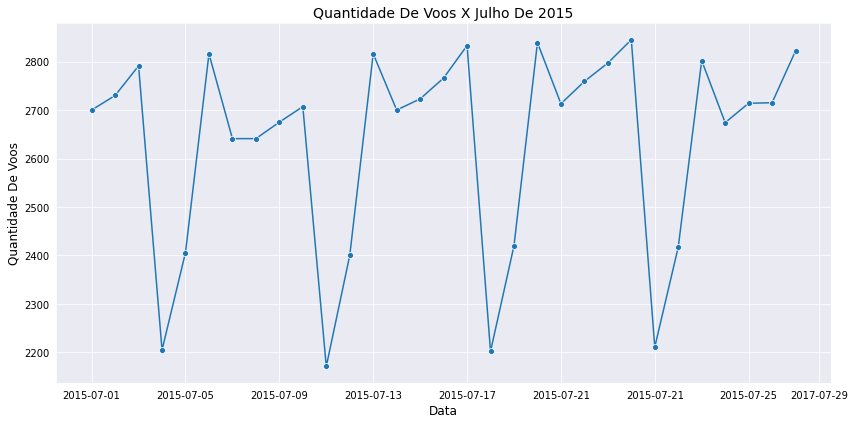

In [ ]:
# Quantidade de voos nas datas do mês de Julho de 2015:
ax = sns.lineplot(data = df_2[(df_2['dt'] >= '2015-07-01') & (df_2['dt'] <= '2015-07-31')].groupby('dt'
                ).agg({'voos':np.count_nonzero}).reset_index(),
                x = 'dt',
                y = 'voos',
                marker = 'o')
ax.figure.set_size_inches((12, 6))
ax.set_ylabel('Quantidade De Voos', fontsize = 12, color = 'k')
ax.set_xlabel('Data', fontsize = 12, color = 'k')
ax.set_xticklabels(labels = ['2015-07-01', '2015-07-05', '2015-07-09', '2015-07-13', '2015-07-17', 
                             '2015-07-21', '2015-07-21', '2015-07-25', '2017-07-29', '2015-08-01'],
                   color = 'k', fontsize = 10)
ax.set_title('Quantidade De Voos X Julho De 2015', fontsize = 14, color = 'k')
ax.set_yticklabels([2200, 2200, 2300, 2400, 2500, 2600, 2700, 2800], fontsize = 10, color = 'k')
plt.tight_layout();

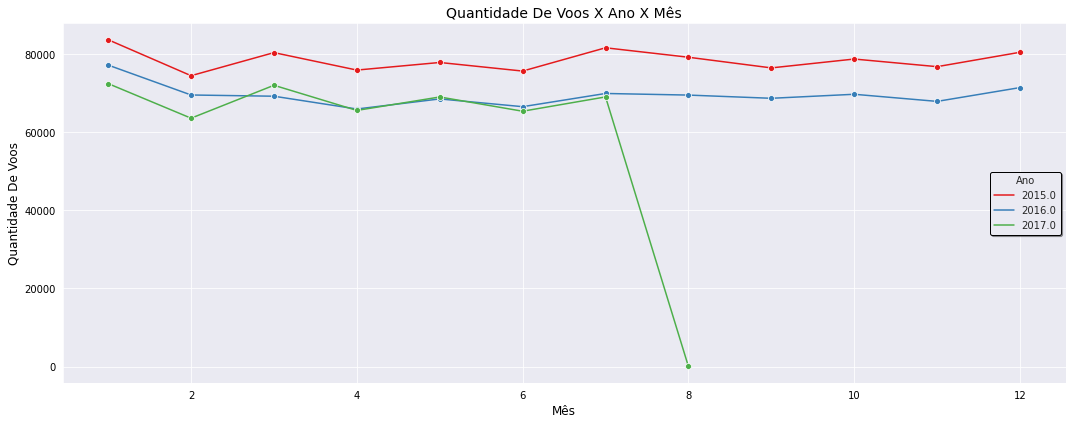

In [ ]:
# Gráfico de linha da quantidade de voos por mês de cada ano:
ax = sns.lineplot(data = df.assign(ano = df['dt_part_real'].dt.year, mes = df['dt_part_real'].dt.month).groupby(['ano', 'mes']).agg({'voos':
                                                                                                            np.count_nonzero}).reset_index(),
                  x = 'mes',
                  hue = 'ano',
                  y = 'voos',
                  marker = 'o',
                  palette = 'Set1')
ax.figure.set_size_inches((15, 6))
ax.set_xlabel('Mês', fontsize = 12, color = 'k')
ax.set_ylabel('Quantidade De Voos', fontsize = 12, color = 'k')
ax.set_title('Quantidade De Voos X Ano X Mês', fontsize = 14, color = 'k')
ax.set_xticklabels(labels = [2, 2, 4, 6, 8, 10, 12], color = 'k', fontsize = 10)
ax.set_yticklabels([0, 0, 20000, 40000, 60000, 80000], fontsize = 10, color = 'k')
plt.legend(loc = 'center right', title = 'Ano', shadow = True, edgecolor = 'k')
plt.tight_layout();

#### 04 - Quais são os aeroportos de origem com voos mais frequentes?

In [ ]:
# Há dois aeroportos de origem em que voos não foram realizados.
print('Quantidade de aeroportos de origem:', df['aero_origem'].nunique())
print('\n')
print('Dados não-nulos de voos dos aeroportos de origem:', (df[df['dt_part_real'].isnull() == False]['aero_origem'].nunique()))

Quantidade de aeroportos de origem: 189


Dados não-nulos de voos dos aeroportos de origem: 187


In [ ]:
# Agrupamento dos aeroportos de origem com voos mais frequentes:
df.groupby('aero_origem').agg({'voos':np.count_nonzero}).reset_index().sort_values('voos', ascending = False)

,aero_origem,voos
76,Guarulhos - Governador Andre Franco Montoro,344835
145,Presidente Juscelino Kubitschek,190010
49,Congonhas,162301
3,Aeroporto Internacional Do Rio De Janeiro/Galeao,158571
182,Viracopos,154737
...,...,...
47,Cochabamba,51
43,Cheddi Jagan Intl,45
90,La Romana,29
163,Santo Angelo,17


In [ ]:
# Atribuição do agrupamento à uma nova variável:
df_3 = df.groupby('aero_origem').agg({'voos':np.count_nonzero}).reset_index().sort_values('voos', ascending = False)
print(df_3.shape)
df_3.head(10)

(189, 2)


,aero_origem,voos
76,Guarulhos - Governador Andre Franco Montoro,344835
145,Presidente Juscelino Kubitschek,190010
49,Congonhas,162301
3,Aeroporto Internacional Do Rio De Janeiro/Galeao,158571
182,Viracopos,154737
172,Tancredo Neves,138723
164,Santos Dumont,95947
58,Deputado Luis Eduardo Magalhaes,89312
159,Salgado Filho,85470
6,Afonso Pena,83567


In [ ]:
# Percentual dos aeroportos de origem de voos mais frequentes:
df_3['perc_voos'] = (df_3['voos'] / df.shape[0] * 100).round(2)
df_3.head(20)

,aero_origem,voos,perc_voos
76,Guarulhos - Governador Andre Franco Montoro,344835,13.56
145,Presidente Juscelino Kubitschek,190010,7.47
49,Congonhas,162301,6.38
3,Aeroporto Internacional Do Rio De Janeiro/Galeao,158571,6.24
182,Viracopos,154737,6.09
172,Tancredo Neves,138723,5.46
164,Santos Dumont,95947,3.77
58,Deputado Luis Eduardo Magalhaes,89312,3.51
159,Salgado Filho,85470,3.36
6,Afonso Pena,83567,3.29


In [ ]:
# Acumulação somática dos dados (ex: 20 linhas representa 76% dos aeroportos de origem de voos mais frequentes):
df_3['acumulado'] = df_3['perc_voos'].cumsum()
df_3.head(20)

,aero_origem,voos,perc_voos,acumulado
76,Guarulhos - Governador Andre Franco Montoro,344835,13.56,13.56
145,Presidente Juscelino Kubitschek,190010,7.47,21.03
49,Congonhas,162301,6.38,27.41
3,Aeroporto Internacional Do Rio De Janeiro/Galeao,158571,6.24,33.65
182,Viracopos,154737,6.09,39.74
172,Tancredo Neves,138723,5.46,45.20
164,Santos Dumont,95947,3.77,48.97
58,Deputado Luis Eduardo Magalhaes,89312,3.51,52.48
159,Salgado Filho,85470,3.36,55.84
6,Afonso Pena,83567,3.29,59.13


In [ ]:
# Renomeação do nome da coluna de voos:
df_3.rename({'voos': 'qtd_voos'}, axis = 1, inplace = True)
df_3.columns

Index(['aero_origem', 'qtd_voos', 'perc_voos', 'acumulado'], dtype='object')

In [ ]:
# Seleção dos 20 aeroportos de origem com voos mais frequentes:
df_3 = df_3.iloc[0:20, :]
print(df_3.shape)
df_3.head()

(20, 4)


,aero_origem,qtd_voos,perc_voos,acumulado
76,Guarulhos - Governador Andre Franco Montoro,344835,13.56,13.56
145,Presidente Juscelino Kubitschek,190010,7.47,21.03
49,Congonhas,162301,6.38,27.41
3,Aeroporto Internacional Do Rio De Janeiro/Galeao,158571,6.24,33.65
182,Viracopos,154737,6.09,39.74


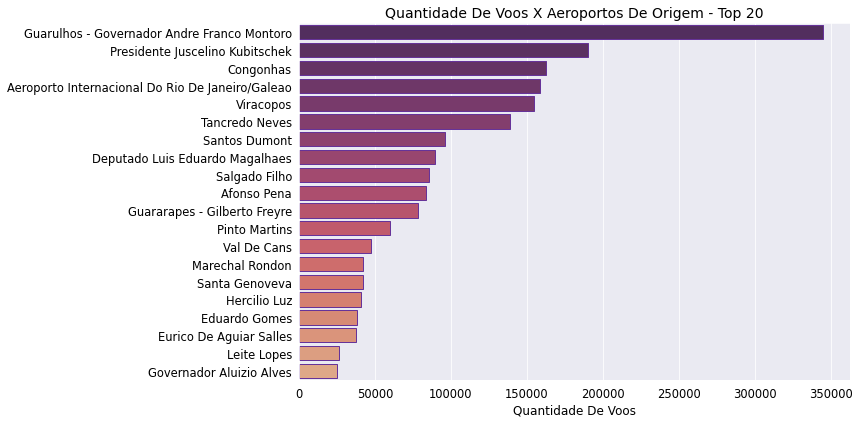

In [ ]:
# Gráfico de barras horizontais dos 20 aeroportos de origem de voos mais frequentes:
ax = sns.barplot(data = df_3,
                 x = 'qtd_voos',
                 y = 'aero_origem',
                 palette = 'flare_r',
                 edgecolor = 'rebeccapurple')
ax.figure.set_size_inches((12, 6))
ax.set_ylabel('')
ax.set_xlabel('Quantidade De Voos', fontsize = 12, color = 'k')
ax.set_title('Quantidade De Voos X Aeroportos De Origem - Top 20', fontsize = 14, color = 'k')
ax.set_yticklabels(labels = df_3['aero_origem'].unique(), color = 'k', fontsize = 11.5)
ax.set_xticklabels([0, 50000, 100000, 150000, 200000, 250000, 300000, 350000], fontsize = 11.5, color = 'k')
plt.tight_layout();

#### 05 - Quais são os aeroportos de destino mais frequentes dos voos de Guarulhos?

In [ ]:
# Filtragem de voos originados de Guarulhos, juntamente com a coluna dos dados de aeroportos de destino.
# Atribuição de todo filtro à uma nova variável.
df_4 = df[df['aero_origem'] == 'Guarulhos - Governador Andre Franco Montoro'].loc[:, ['aero_origem', 'voos', 'aero_destino']]
print(df_4.shape)
df_4.head(10)

(344835, 3)


,aero_origem,voos,aero_destino
215,Guarulhos - Governador Andre Franco Montoro,AAL - 234,Miami
216,Guarulhos - Governador Andre Franco Montoro,AAL - 234,Miami
217,Guarulhos - Governador Andre Franco Montoro,AAL - 234,Miami
218,Guarulhos - Governador Andre Franco Montoro,AAL - 234,Miami
219,Guarulhos - Governador Andre Franco Montoro,AAL - 234,Miami
220,Guarulhos - Governador Andre Franco Montoro,AAL - 234,Miami
221,Guarulhos - Governador Andre Franco Montoro,AAL - 234,Miami
222,Guarulhos - Governador Andre Franco Montoro,AAL - 234,Miami
223,Guarulhos - Governador Andre Franco Montoro,AAL - 234,Miami
224,Guarulhos - Governador Andre Franco Montoro,AAL - 234,Miami


In [ ]:
# Agrupamento em ordem decrescente dos aeroportos destinados mais frequentes:
df_5 = df_4.groupby('aero_destino').agg({'voos':np.count_nonzero}).reset_index().sort_values('voos', ascending = False)
df_5.head(5)

,aero_destino,voos
89,Salgado Filho,19074
29,Deputado Luis Eduardo Magalhaes,18759
5,Afonso Pena,17183
38,Guararapes - Gilberto Freyre,16118
98,Tancredo Neves,14761


In [ ]:
# Nova coluna que representa a porcentagem de voos dos aeroportos de destino mais frequentes:
df_5['perc_voos'] = (df_5['voos'] / df_4.shape[0] * 100).round(2)
df_5.head()

,aero_destino,voos,perc_voos
89,Salgado Filho,19074,5.53
29,Deputado Luis Eduardo Magalhaes,18759,5.44
5,Afonso Pena,17183,4.98
38,Guararapes - Gilberto Freyre,16118,4.67
98,Tancredo Neves,14761,4.28


In [ ]:
# Acumulação dos aeroportos de destino mais frequentes atribuídos à uma nova coluna.
# As cinco primeiras linhas representam aproximadamente 25% dos dados.
df_5['acumulado'] = df_5['perc_voos'].cumsum()
df_5.head(5)

,aero_destino,voos,perc_voos,acumulado
89,Salgado Filho,19074,5.53,5.53
29,Deputado Luis Eduardo Magalhaes,18759,5.44,10.97
5,Afonso Pena,17183,4.98,15.95
38,Guararapes - Gilberto Freyre,16118,4.67,20.62
98,Tancredo Neves,14761,4.28,24.90


In [ ]:
# O nome dos cinco primeiros aeroportos de destino mais destacados de Guarulhos:
lista = df_5['aero_destino'][:5].to_list()
lista

['Salgado Filho',
 'Deputado Luis Eduardo Magalhaes',
 'Afonso Pena',
 'Guararapes - Gilberto Freyre',
 'Tancredo Neves']

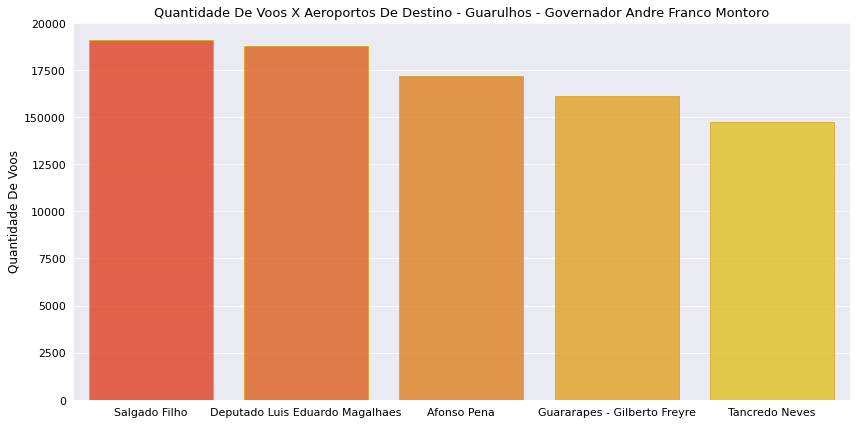

In [ ]:
# Gráfico de colunas para representar visualmente os cinco aeroportos de destino dos voos de Guarulhos:
ax = sns.barplot(data = df_5.head(5),
                 x = 'aero_destino',
                 y = 'voos',
                 palette = 'autumn',
                 alpha = 0.8,
                 edgecolor = 'goldenrod')
ax.figure.set_size_inches((12, 6))
ax.set_ylabel('Quantidade De Voos', fontsize = 12, color = 'k')
ax.set_xlabel('')
ax.set_xticklabels(labels = lista, color = 'k', fontsize = 11)
ax.set_title('Quantidade De Voos X Aeroportos De Destino - Guarulhos - Governador Andre Franco Montoro',
             fontsize = 13, color = 'k')
ax.set_yticklabels([0, 2500, 5000, 7500, 10000, 12500, 150000, 17500, 20000], fontsize = 11, color = 'k')
plt.tight_layout();

#### 06 - Quais são os tipos de voos mais utilizados?

In [ ]:
# Verificação dos valores únicos de tipos de voos:
df['tp_voo'].unique()

array(['Internacional', 'Regional', 'Nacional'], dtype=object)

In [ ]:
# Quantidade de voos por tipo de voo (2015-2017):
df['tp_voo'].value_counts()

Nacional         1780316
Regional          441240
Internacional     320959
Name: tp_voo, dtype: int64

In [ ]:
# Porcentagem da quantidade de voos por tipo de voo (2015-2017):
# -> Os voos nacionais representam 70% dos voos
# -> Os voos regionais representam 17% dos voos
# -> Os voos internacionais representam 12% dos voos
(df['tp_voo'].value_counts(normalize = True) * 100).round(2)

Nacional         70.02
Regional         17.35
Internacional    12.62
Name: tp_voo, dtype: float64

In [ ]:
# Quantidade de voos por tipo de voo por cada ano:
df.groupby(['tp_voo', df['dt_part_real'].dt.year]).agg({'voos': np.count_nonzero}).reset_index()

,tp_voo,dt_part_real,voos
0,Internacional,2015.0,124908
1,Internacional,2016.0,116302
2,Internacional,2017.0,65833
3,Nacional,2015.0,682616
4,Nacional,2016.0,596677
5,Nacional,2017.0,327906
6,Regional,2015.0,134083
7,Regional,2016.0,121447
8,Regional,2017.0,83547


In [ ]:
# Agrupamento da quantidade de voos por tipos de voos por data (2015-2017):
df_6 = df.assign(dt = df['dt_part_real'].dt.strftime('%Y-%m-%d').astype('datetime64[ns]'),
          tp = df['tp_voo']).groupby(['dt', 'tp']).agg({'voos':np.count_nonzero}).reset_index()
df_6.head()

,dt,tp,voos
0,2015-01-01,Internacional,361
1,2015-01-01,Nacional,1620
2,2015-01-01,Regional,280
3,2015-01-02,Internacional,357
4,2015-01-02,Nacional,1889


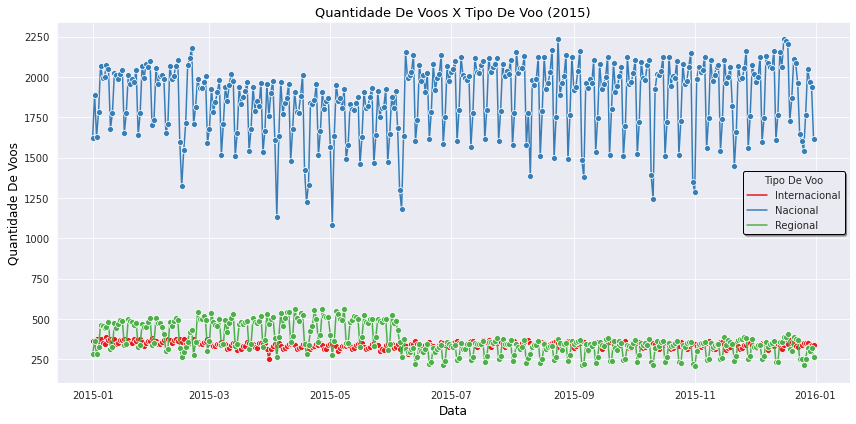

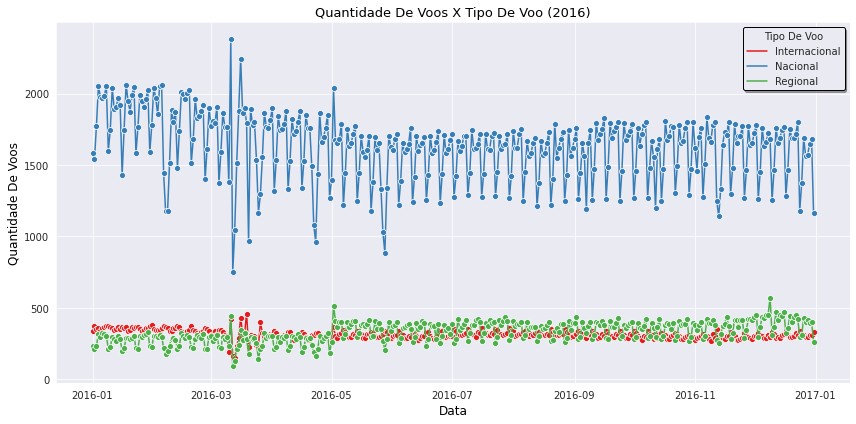

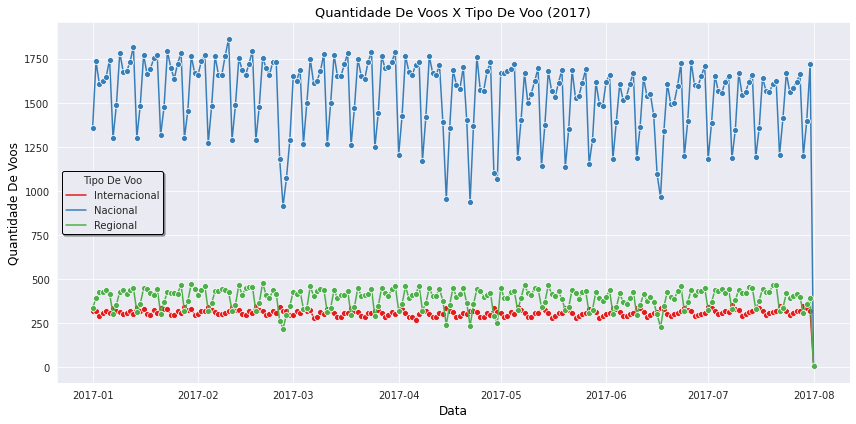

<Figure size 432x288 with 0 Axes>

In [ ]:
# Gráfico de linhas para representar a quantidade de voos separadamente por tipos de voos em relação às datas nos anos de 2015
# até 2017:
sns.set_style('darkgrid')
for ano in df_6['dt'].dt.year.unique():
  ax1 = sns.lineplot(
      data = df_6[df_6['dt'].dt.year == ano],
      x = 'dt',
      y = 'voos',
      hue = 'tp',
      marker = 'o',
      palette = 'Set1')
  ax1.figure.set_size_inches(12, 6)
  ax1.set_xlabel('Data', fontsize = 12, color = 'k')
  ax1.set_ylabel('Quantidade De Voos', fontsize = 12, color = 'k')
  ax1.set_title(f'Quantidade De Voos X Tipo De Voo ({ano})', fontsize = 13, color = 'k')
  plt.legend(title = 'Tipo De Voo', edgecolor = 'k', shadow = True)
  plt.tight_layout()
  plt.figure();

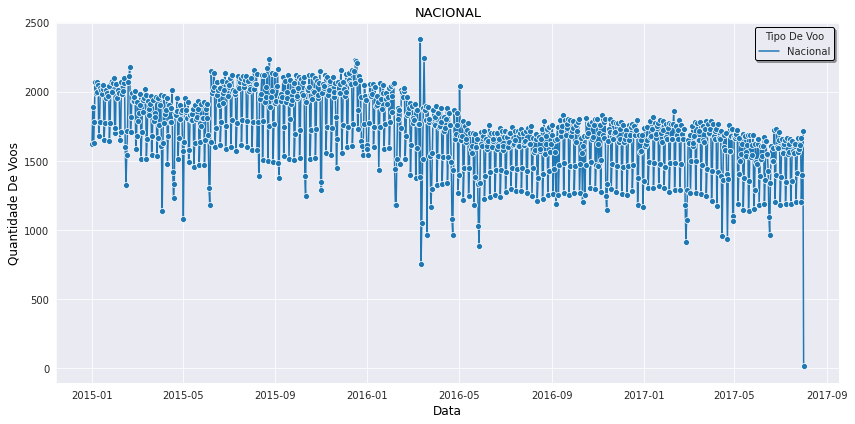

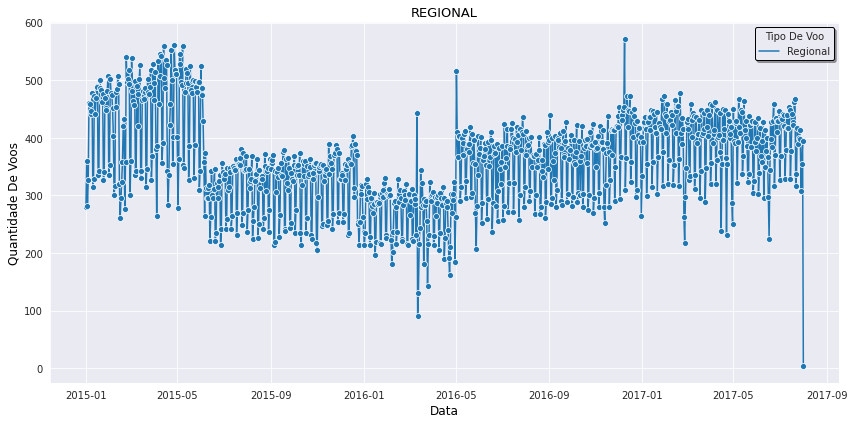

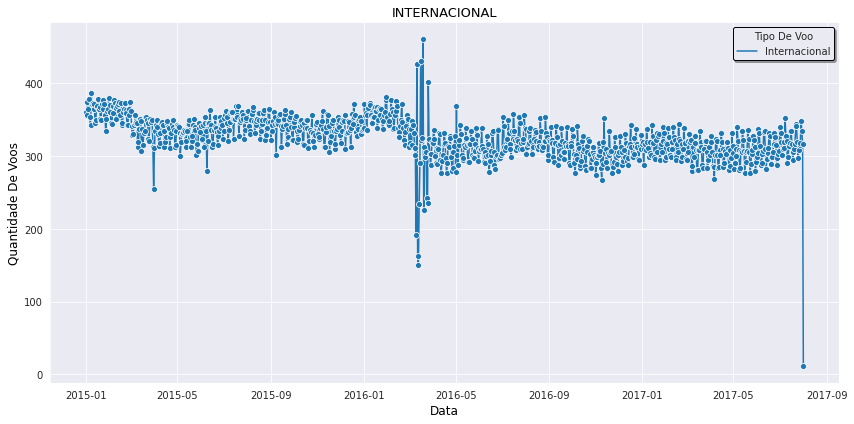

<Figure size 432x288 with 0 Axes>

In [ ]:
# Gráficos de linha como representação visual da quantidade de voos separadamente pelos tipos de voos:
for tp_voo in ['Nacional', 'Regional', 'Internacional']:
  ax1 = sns.lineplot(
        data = df_6[df_6['tp'] == tp_voo],
        x = 'dt',
        y = 'voos',
        hue = 'tp',
        marker = 'o',
        )
  ax1.figure.set_size_inches(12, 6)
  ax1.set_xlabel('Data', fontsize = 12, color = 'k')
  ax1.set_ylabel('Quantidade De Voos', fontsize = 12, color = 'k')
  ax1.set_title(tp_voo.upper(), fontsize = 13, color = 'k')
  plt.legend(title = 'Tipo De Voo', edgecolor = 'k', shadow = True)
  plt.tight_layout()
  plt.figure();


In [ ]:
# Atribuição dos valores de tipos de voos à uma variável do tipo lista:
val_tp_voo = df['tp_voo'].value_counts().to_list()
print(val_tp_voo)

[1780316, 441240, 320959]


In [ ]:
# Atribuição de cada tipo de voo à uma variável do tipo lista:
tipo_voos = df['tp_voo'].value_counts().index.to_list()
print(tipo_voos)

['Nacional', 'Regional', 'Internacional']


In [ ]:
# Atribuição de cores à uma variável para colocar no gráfico de pizza:
cores = sns.color_palette('Set2')[0:3]

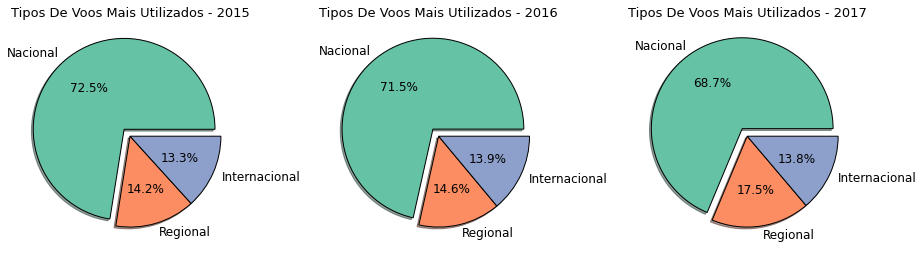

In [ ]:
# Gráfico de pizza para representar visualmente os tipos de voos mais utilizados
# percentualmente em cada ano - 2016, 2017, 2018:
ano_15 = df[df['dt_part_real'].dt.year == 2015].tp_voo.value_counts().to_list()
ano_16 = df[df['dt_part_real'].dt.year == 2016].tp_voo.value_counts().to_list()
ano_17 = df[df['dt_part_real'].dt.year == 2017].tp_voo.value_counts().to_list()
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 6))
ax1.pie(x = ano_15, labels = tipo_voos, wedgeprops = {'edgecolor': 'k'},
        textprops = {'color': 'k', 'fontsize': 12}, shadow = True,
        autopct = '%1.1f%%', explode = (0.1, 0, 0), colors = cores)
ax2.pie(x = ano_16, labels = tipo_voos, wedgeprops = {'edgecolor': 'k'},
        textprops = {'color': 'k', 'fontsize': 12}, shadow = True,
        autopct = '%1.1f%%', explode = (0.1, 0, 0), colors = cores)
ax3.pie(x = ano_17, labels = tipo_voos, wedgeprops = {'edgecolor': 'k'},
        textprops = {'color': 'k', 'fontsize': 12}, shadow = True,
        autopct = '%1.1f%%', explode = (0.1, 0, 0), colors = cores)
ax1.set_title('Tipos De Voos Mais Utilizados - 2015', fontsize = 13, color = 'k')
ax2.set_title('Tipos De Voos Mais Utilizados - 2016', fontsize = 13, color = 'k')
ax3.set_title('Tipos De Voos Mais Utilizados - 2017', fontsize = 13, color = 'k')
plt.tight_layout();

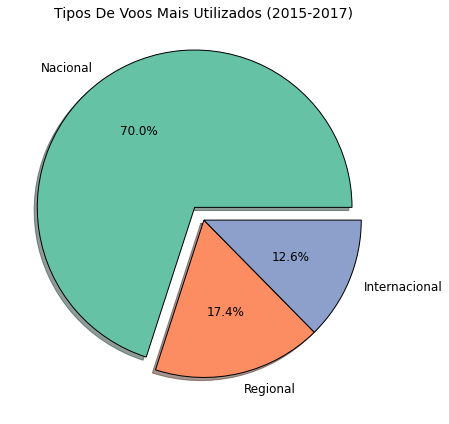

In [ ]:
# Gráfico de pizza para representar visualmente os tipos de voos mais utilizados
# em porcentagem no período de 2015 até 2017:
plt.figure(figsize = (12, 6))
plt.pie(x = val_tp_voo, labels = tipo_voos, wedgeprops = {'edgecolor': 'k'}, 
             textprops = {'color': 'k', 'fontsize': 12}, shadow = True,
        autopct = '%1.1f%%', explode = (0.1, 0, 0), colors = cores)
plt.title('Tipos De Voos Mais Utilizados (2015-2017)', fontsize = 14, color = 'k')
plt.tight_layout();

#### 07 - Quais são às companhias aéreas que mais se destacam?

In [ ]:
# Verificação quantitativa e nominal dos valores únicos das companhias aéreas:
print(f'{df.comp_aerea.nunique()} companhias aéreas')
print('\n')
print(df['comp_aerea'].unique())

56 companhias aéreas


['AMERICAN AIRLINES INC' 'AIR CANADA' 'AIR EUROPA S/A' 'AIR FRANCE'
 'AIRES - LAN COLOMBIA' 'AEROLINEAS ARGENTINAS'
 'AUSTRAL LINEAS A\\90REAS CIELOS DEL SUR S.A' 'AVIANCA' 'ALITALIA' 'AZUL'
 'BRITISH AIRWAYS PLC' 'BOLIVIANA DE AVIACION' 'AIR CHINA'
 'CONDOR FLUGDINST' 'COPA -COMPANIA PANAMENA DE AVIACION' 'DELTA AIRLINES'
 'LUFTHANSA' 'LAN ARGENTINA S/A' 'TAAG LINHAS AEREAS DE ANGOLA' 'ETIHAD'
 'ETHIOPIAN' 'GOL' 'IBERIA' 'INSELAIR' 'MERIDIANA' 'KOREAN AIRLINES'
 'KLM ROYAL DUTCH AIRLINES' 'LAN CHILE' 'TAM TRANSP. AR. DEL. MERCOS'
 'LAN PERU S/A' 'AVIANCA BRASIL' 'MAP LINHAS AEREAS' 'PASSAREDO'
 'QATAR AIRWAYS' 'ROYAL AIR MAROC' 'SOUTH \\B5FRICAN AIRWAYS'
 'SINGAPORE AIRLINES' 'SURINAM AIRWAYS' 'SWISSAIR' 'NAO INFORMADO' 'TAM'
 'TAP AIR PORTUGAL' 'EMPRESA DE TRANSPORTES AEREOS DE CABO VERDE S.A.'
 'TURKISH AIRLINES INC.' 'TRASAMERICA  AIRLINES-TACAPERU' 'TOTAL'
 'EMIRATES' 'UNITED AIRLINES' 'FLYWAYS' 'EDELWEISS'
 'LINEAS AE.COSTARRICENCES S/A' 'SETE' 'AIR ITALY S

In [ ]:
# Porcentagem das dez companhias aéreas mais destacadas:
(df['comp_aerea'].value_counts(normalize = True)[:10] * 100).round(2)

GOL                                    29.86
AZUL                                   29.20
TAM                                    21.79
AVIANCA BRASIL                          7.23
PASSAREDO                               2.77
AMERICAN AIRLINES INC                   0.90
COPA -COMPANIA PANAMENA DE AVIACION     0.83
TAP AIR PORTUGAL                        0.74
AEROLINEAS ARGENTINAS                   0.65
MAP LINHAS AEREAS                       0.62
Name: comp_aerea, dtype: float64

In [ ]:
# Agrupamento das companhias aéreas e suas respectivas quantidades de voos:
df_companhia = df.groupby('comp_aerea').agg({'voos': np.count_nonzero}).reset_index().sort_values('voos', ascending = False)[:10]
df_companhia.head()

,comp_aerea,voos
25,GOL,759191
13,AZUL,742492
47,TAM,554099
12,AVIANCA BRASIL,183913
38,PASSAREDO,70436


In [ ]:
# Porcentagem das companhias aéreas e acumulação representacional dos dados, que representam aproximadamente 95% dos dados:
df_companhia['perc_voos'] = (df_companhia['voos'] / df.shape[0] * 100).round(2)
df_companhia['acumulado'] = df_companhia['perc_voos'].cumsum()
df_companhia.head(10)

,comp_aerea,voos,perc_voos,acumulado
25,GOL,759191,29.86,29.86
13,AZUL,742492,29.20,59.06
47,TAM,554099,21.79,80.85
12,AVIANCA BRASIL,183913,7.23,88.08
38,PASSAREDO,70436,2.77,90.85
9,AMERICAN AIRLINES INC,22975,0.90,91.75
17,COPA -COMPANIA PANAMENA DE AVIACION,21034,0.83,92.58
49,TAP AIR PORTUGAL,18878,0.74,93.32
0,AEROLINEAS ARGENTINAS,16522,0.65,93.97
35,MAP LINHAS AEREAS,15675,0.62,94.59


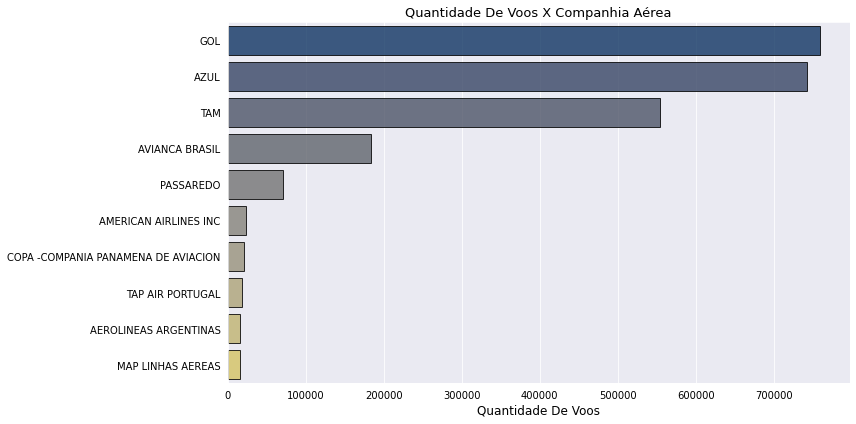

In [ ]:
# Top 10 das companhias aéreas mais destacadas:
ax = sns.barplot(
    data = df_companhia,
    x = 'voos',
    y = 'comp_aerea',
    alpha = 0.8,
    palette = 'cividis',
    edgecolor = 'black')
ax.figure.set_size_inches(12, 6)
ax.set_ylabel('')
ax.set_yticklabels(labels = df_companhia['comp_aerea'].unique(), color = 'k', fontsize = 10)
ax.set_xlabel('Quantidade De Voos', fontsize = 12, color = 'k')
ax.set_title('Quantidade De Voos X Companhia Aérea', fontsize = 13, color = 'k')
ax.set_xticklabels(list(range(0, 700001, 100000)), fontsize = 10, color = 'k')
plt.tight_layout();

#### 08 - Qual é a hora que mais têm voos programados? 

In [ ]:
# Verificação percentual dos cinco horários que há mais voos programados:
(df['dt_part_prev'].dt.hour.value_counts(normalize = True) * 100).round(2)[:5]

17    6.08
9     5.80
15    5.75
6     5.73
10    5.70
Name: dt_part_prev, dtype: float64

In [ ]:
# Agrupamento dos horários programacionais de voos em relação respectivamente à quantidade de voos programadas em tais horas:
df_7 = df.groupby(df['dt_part_prev'].dt.hour).agg({'voos':np.count_nonzero}).reset_index().sort_values('voos', ascending = False)[:5]
df_7

,dt_part_prev,voos
17,17,154475
9,9,147463
15,15,146218
6,6,145578
10,10,144918


In [ ]:
# Criação da coluna percentual de voos por horário programacional e coluna de acumulação percentual:
# Ex: Os 5 dados da coluna acumulado representam 29% dos dados: 
df_7['perc_voos'] = (df_7['voos'] / df.shape[0] * 100).round(2)
df_7['acumulado'] = df_7['perc_voos'].cumsum()
df_7.head()

,dt_part_prev,voos,perc_voos,acumulado
17,17,154475,6.08,6.08
9,9,147463,5.80,11.88
15,15,146218,5.75,17.63
6,6,145578,5.73,23.36
10,10,144918,5.70,29.06


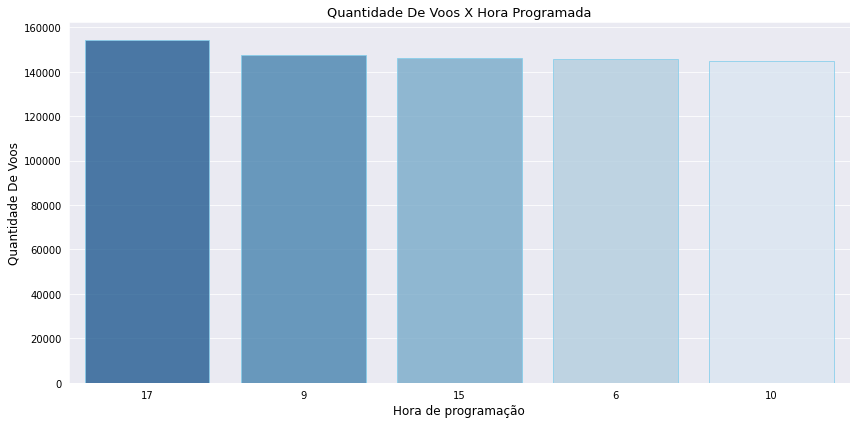

In [ ]:
# Gráfico de colunas para representar as horas com mais voos programados:
df_7['dt_part_prev'] = df_7.dt_part_prev.astype('str')
ax = sns.barplot(data = df_7,
                 x = 'dt_part_prev',
                 y = 'voos',
                 alpha = 0.8,
                 palette = 'Blues_r',
                 edgecolor = 'skyblue')
ax.figure.set_size_inches(12, 6)
ax.set_ylabel('Quantidade De Voos', fontsize = 12, color = 'k')
ax.set_xlabel('Hora de programação', fontsize = 12, color = 'k')
ax.set_title('Quantidade De Voos X Hora Programada', fontsize = 13, color = 'k')
ax.set_xticklabels(labels = list(df_7['dt_part_prev'].unique()), fontsize = 10, color = 'k')
ax.set_yticklabels(list(range(0, 160001, 20000)), fontsize = 10, color = 'k')
plt.tight_layout();

In [ ]:
# Agrupamento das horas de voo programado por ano: 
df_hora_p_ano = df.assign(ano = df['dt_part_prev'].dt.year, hora = df['dt_part_prev'].dt.hour
          ).groupby(['ano', 'hora']).agg({'voos': 'size'}).reset_index().sort_values('voos', ascending = False)
df_hora_p_ano.head()

,ano,hora,voos
15,2015,15,63571
10,2015,10,61989
17,2015,17,61612
41,2016,17,60386
6,2015,6,60010


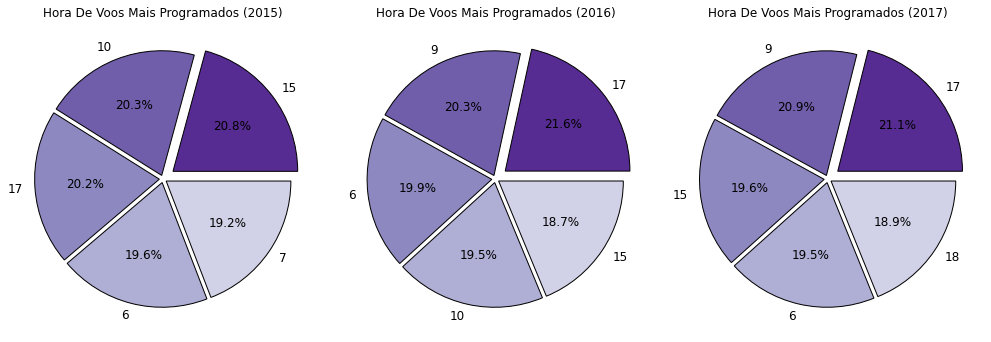

In [ ]:
# Gráfico de pizza das horas de voos mais programados por ano (2015-2017) representadas percentualmente:
cores = sns.color_palette('Purples_r')[:5]
x = df_hora_p_ano[df_hora_p_ano['ano'] == 2015].head(5)
y = df_hora_p_ano[df_hora_p_ano['ano'] == 2016].head(5)
z = df_hora_p_ano[df_hora_p_ano['ano'] == 2017].head(5)
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 6))
ax1.pie(x = x['voos'].to_list(), labels = x['hora'].to_list(), colors = cores,
        wedgeprops = {'edgecolor': 'k'}, textprops = {'color': 'k', 'fontsize': 12},
        explode = [0.1, 0.03, 0.03, 0.03, 0.03], autopct = '%1.1f%%')
ax2.pie(x = y['voos'].to_list(), labels = y['hora'].to_list(), colors = cores,
        wedgeprops = {'edgecolor': 'k'}, textprops = {'color': 'k', 'fontsize': 12},
        autopct = '%1.1f%%', explode = [0.1, 0.03, 0.03, 0.03, 0.03])
ax3.pie(x = z['voos'].to_list(), labels = z['hora'].to_list(), colors = cores,
        wedgeprops = {'edgecolor': 'k'}, textprops = {'color': 'k', 'fontsize': 12},
        autopct = '%1.1f%%', explode = [0.1, 0.03, 0.03, 0.03, 0.03])
ax1.set_title('Hora De Voos Mais Programados (2015)', fontsize = 12, color = 'k')
ax2.set_title('Hora De Voos Mais Programados (2016)', fontsize = 12, color = 'k')
ax3.set_title('Hora De Voos Mais Programados (2017)', fontsize = 12, color = 'k')
plt.tight_layout();

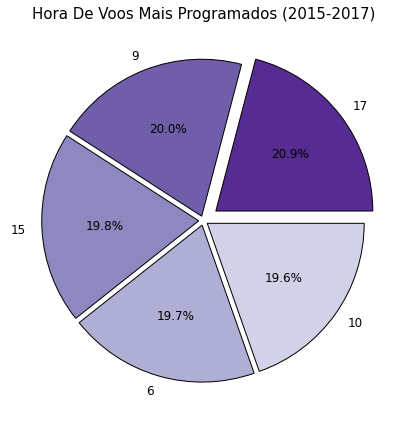

In [ ]:
# Gráfico de pizza para representar visualmente as horas em que mais voos são programados em todos os anos:
cores = sns.color_palette('Purples_r')
plt.figure(figsize = (12, 6))
ax = plt.pie(x = df_7['voos'],
             labels = df_7['dt_part_prev'].to_list(),
             wedgeprops = {'edgecolor': 'k'},
             textprops = {'color': 'k', 'fontsize': 12},
             autopct = '%1.1f%%', explode = [0.1, 0.03, 0.03, 0.03, 0.03],
             colors = cores)
plt.title('Hora De Voos Mais Programados (2015-2017)', fontsize = 15, color = 'k')
plt.tight_layout();

#### 09 - Expectativa x Realidade: Os vôos cumprem com o prazo prometido?

In [ ]:
# Porcentagem de voos atrasados e de voos pontuais:
print('% De Voos Atrasados: {0:.2f}'.format((df[df['dt_part_real'] > df['dt_part_prev']].shape[0] / df.shape[0] * 100)))
print('\n')
print('% De Voos Pontuais: {0:.2f}'.format((df[df['dt_part_prev'] == df['dt_part_real']].shape[0] / df.shape[0] * 100)))
print('\n')
print('% De Voos Antecipados: {0:.2f}'.format((df[df['dt_part_prev'] > df['dt_part_real']].shape[0] / df.shape[0] * 100)))

% De Voos Atrasados: 13.99


% De Voos Pontuais: 59.84


% De Voos Antecipados: 14.80


In [ ]:
# Atribuição de voos atrasados e voos pontuais à variáveis diferentes:
df_pont = df[df['dt_part_prev'] == df['dt_part_real']]
df_atras = df[df['dt_part_prev'] < df['dt_part_real']]
df_ant = df[df['dt_part_prev'] > df['dt_part_real']]

In [ ]:
# Visualização breve do formato e do dataframe de voos pontuais:
print(df_pont.shape)
df_pont.head(2)

(1521376, 21)


,voos,comp_aerea,tp_voo,dt_part_prev,dt_part_real,dt_cheg_prev,dt_cheg_real,situacao,justificativa,aero_origem,...,uf_origem,pais_origem,aero_destino,city_destino,uf_destino,pais_destino,long_destino,lat_destino,long_origem,lat_origem
0,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30 08:58:00,2016-01-30 08:58:00,2016-01-30 10:35:00,2016-01-30 10:35:00,1,NaN,Afonso Pena,...,PR,Brasil,Salgado Filho,Porto Alegre,RS,Brasil,-51.175381,-29.993473,-49.172481,-25.532713
1,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-13 12:13:00,2016-01-13 12:13:00,2016-01-13 21:30:00,2016-01-13 21:30:00,1,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473


In [ ]:
# Visualização breve do formato e do dataframe de voos atrasados:
print(df_atras.shape)
df_atras.head(2)

(355739, 21)


,voos,comp_aerea,tp_voo,dt_part_prev,dt_part_real,dt_cheg_prev,dt_cheg_real,situacao,justificativa,aero_origem,...,uf_origem,pais_origem,aero_destino,city_destino,uf_destino,pais_destino,long_destino,lat_destino,long_origem,lat_origem
6,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-05 23:05:00,2016-01-05 23:35:00,2016-01-06 07:50:00,2016-01-06 08:35:00,1,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Miami,...,N/I,Estados Unidos,Afonso Pena,Sao Jose Dos Pinhais,PR,Brasil,-49.172481,-25.532713,-80.287046,25.795865
7,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-18 12:13:00,2016-01-18 13:09:00,2016-01-18 21:30:00,2016-01-18 22:24:00,1,CONEXAO DE AERONAVE,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473


In [ ]:
# Visualização breve do formato e do dataframe de voos antecipados:
print(df_ant.shape)
df_ant.head(2)

(376204, 21)


,voos,comp_aerea,tp_voo,dt_part_prev,dt_part_real,dt_cheg_prev,dt_cheg_real,situacao,justificativa,aero_origem,...,uf_origem,pais_origem,aero_destino,city_destino,uf_destino,pais_destino,long_destino,lat_destino,long_origem,lat_origem
3,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-19 12:13:00,2016-01-18 12:03:00,2016-01-19 21:30:00,2016-01-18 20:41:00,1,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
43,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-27 12:13:00,2016-01-27 11:55:00,2016-01-27 21:30:00,2016-01-27 20:57:00,1,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473


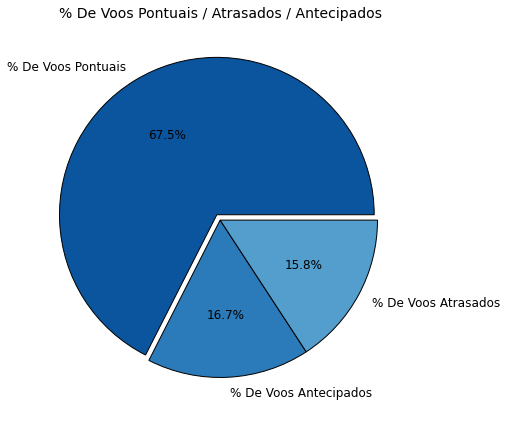

In [ ]:
cores = sns.color_palette('Blues_r')
plt.figure(figsize = (12, 6))
plt.pie(x = [df_pont.shape[0], df_ant.shape[0], df_atras.shape[0]], labels = ['% De Voos Pontuais', '% De Voos Antecipados',
                                                                              '% De Voos Atrasados'],
        wedgeprops = {'edgecolor': 'k'}, textprops = {'color': 'k', 'fontsize': 12},
autopct = '%1.1f%%', explode = [0.04, 0.0, 0.0], colors = cores, rotatelabels = False)
plt.title('% De Voos Pontuais / Atrasados / Antecipados', fontsize = 14, color = 'k')
plt.tight_layout();

In [ ]:
# Agrupamento de voos pontuais por ano em uma variável nova:
df_pont_2 = df_pont.groupby(df_pont['dt_part_prev'].dt.year).agg({'voos':np.count_nonzero}).reset_index()
df_pont_2.head()

,dt_part_prev,voos
0,2015,662718
1,2016,544283
2,2017,314375


In [ ]:
# Agrupamento de voos atrasados por ano em uma variável nova:
df_atras_2 = df_atras.groupby(df_atras['dt_part_prev'].dt.year).agg({'voos': np.count_nonzero}).reset_index()
df_atras_2.head()

,dt_part_prev,voos
0,2015,144468
1,2016,133635
2,2017,77636


In [ ]:
# Agrupamento de voos antecipados por ano:
df_ant_2 = df_ant.groupby(df_ant['dt_part_prev'].dt.year).agg({'voos':np.count_nonzero}).reset_index()
df_ant_2.head()

,dt_part_prev,voos
0,2015,134417
1,2016,156513
2,2017,85274


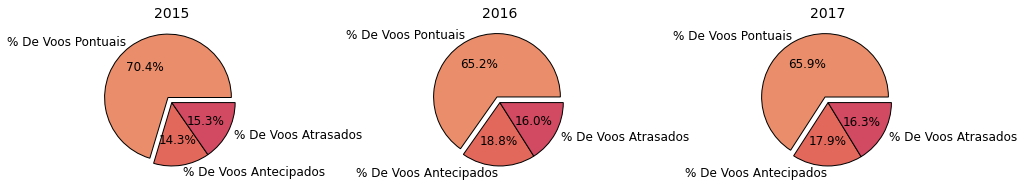

In [ ]:
# Gráfico de pizza para representar visualmente a porcentagems de voos pontuais e atrasados por cada ano:
cores = sns.color_palette('flare')
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1,ncols = 3, figsize = (14, 6))
ax1.pie([df_pont_2[df_pont_2['dt_part_prev'] == 2015].voos[0],
         df_ant_2[df_ant_2['dt_part_prev'] == 2015].voos[0],
         df_atras_2[df_atras_2['dt_part_prev'] == 2015].voos[0]],
        labels = ['% De Voos Pontuais', '% De Voos Antecipados', '% De Voos Atrasados'], wedgeprops = {'edgecolor': 'k'},
        textprops = {'color': 'k', 'fontsize': 12}, explode = [0.1, 0.0, 0.0], autopct = '%1.1f%%',
        colors = cores)
ax1.set_title('2015', fontsize = 14, color = 'k')
ax2.pie([df_pont_2[df_pont_2['dt_part_prev'] == 2016].voos[1],
         df_ant_2[df_ant_2['dt_part_prev'] == 2016].voos[1],
         df_atras_2[df_atras_2['dt_part_prev'] == 2016].voos[1]],
        labels = ['% De Voos Pontuais', '% De Voos Antecipados', '% De Voos Atrasados'], wedgeprops = {'edgecolor': 'k'},
        textprops = {'color': 'k', 'fontsize': 12}, explode = [0.1, 0.0, 0.0], autopct = '%1.1f%%',
        colors = cores)
ax2.set_title('2016', fontsize = 14, color = 'k')
ax3.pie([df_pont_2[df_pont_2['dt_part_prev'] == 2017].voos[2],
         df_ant_2[df_ant_2['dt_part_prev'] == 2017].voos[2],
         df_atras_2[df_atras_2['dt_part_prev'] == 2017].voos[2]],
        labels = ['% De Voos Pontuais', '% De Voos Antecipados','% De Voos Atrasados'], wedgeprops = {'edgecolor': 'k'},
textprops = {'color': 'k', 'fontsize': 12}, explode = [0.1, 0.0, 0.0], autopct = '%1.1f%%', colors = cores)
ax3.set_title('2017', fontsize = 14, color = 'k')
plt.tight_layout();

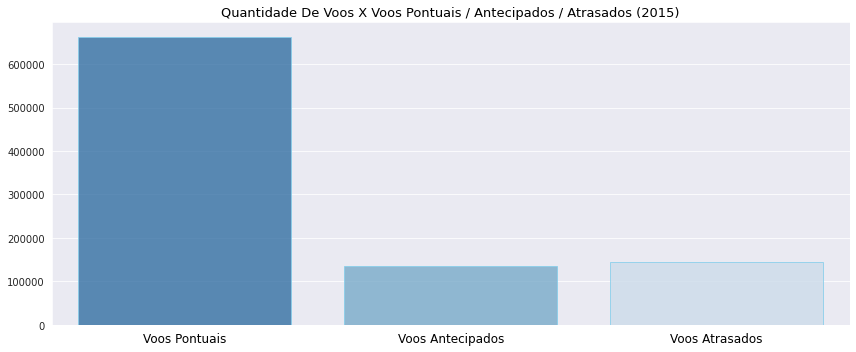

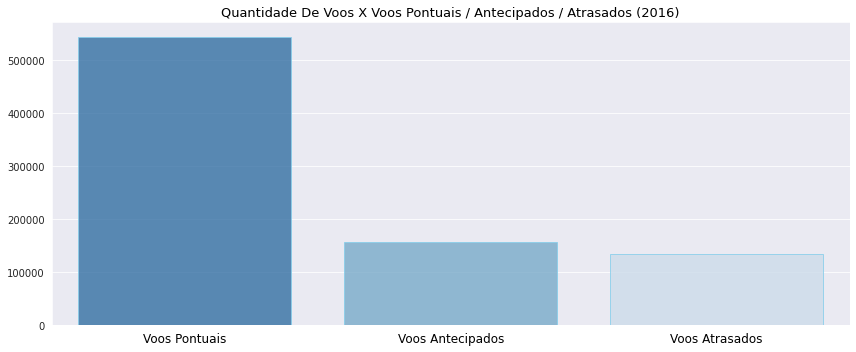

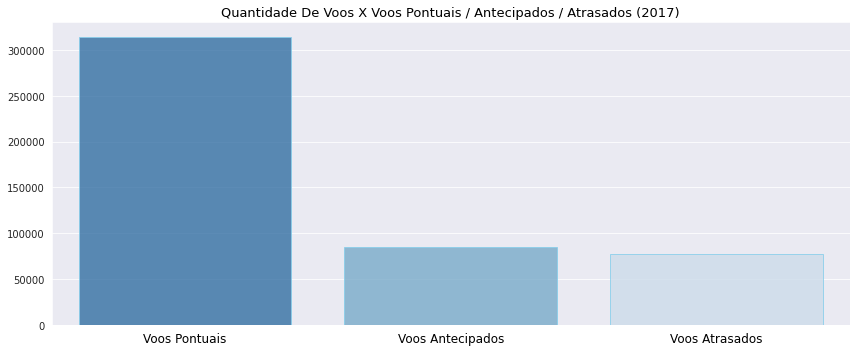

<Figure size 432x288 with 0 Axes>

In [ ]:
# Gráfico de coluna para representar visualmente a quantidade de voos pontuais e atrasados por ano:
j = 0
for ano in [2015, 2016, 2017]:
  ax = sns.barplot(y = [df_pont_2[df_pont_2['dt_part_prev'] == ano].voos[j],
         df_ant_2[df_ant_2['dt_part_prev'] == ano].voos[j],
         df_atras_2[df_atras_2['dt_part_prev'] == ano].voos[j]],
         x = ['Voos Pontuais', 'Voos Antecipados', 'Voos Atrasados'],
         alpha = 0.8, 
         palette = 'Blues_r', edgecolor = 'skyblue')
  ax.figure.set_size_inches(12, 5)
  ax.set_xticklabels(labels = ['Voos Pontuais', 'Voos Antecipados', 'Voos Atrasados'], color = 'k', fontsize = 12)
  ax.set_title('Quantidade De Voos X Voos Pontuais / Antecipados / Atrasados ({0})'.format(ano), fontsize = 13, color = 'k')
  plt.tight_layout()
  plt.figure();
  while (j < 2):
    j += 1
    break
  

In [ ]:
# Quantidade de voos pontuais e atrasados atribuídos à variáveis diferentes:
df_v1 = df_pont.groupby(df_pont.dt_part_prev.dt.year).agg({'voos':np.count_nonzero}).reset_index().sort_values('voos', ascending = False)
df_v2 = df_atras.groupby(df_atras.dt_part_prev.dt.year).agg({'voos': np.count_nonzero}).reset_index().sort_values('voos', ascending = False)
df_v3 = df_ant.groupby(df_ant.dt_part_prev.dt.year).agg({'voos':np.count_nonzero}).reset_index().sort_values('voos', ascending = False)

In [ ]:
# Visualização breve da quantidade de voos pontuais por ano:
df_v1.head()

,dt_part_prev,voos
0,2015,662718
1,2016,544283
2,2017,314375


In [ ]:
# Visualização breve da quantidade de voos atrasados por ano:
df_v2.head()

,dt_part_prev,voos
0,2015,144468
1,2016,133635
2,2017,77636


In [ ]:
# Visualização breve da quantidade de voos antecipados por ano:
df_v3.head()

,dt_part_prev,voos
1,2016,156513
0,2015,134417
2,2017,85274


In [ ]:
# Mudança de nome das colunas para voos pontuais, voos atrasados e voos antecipados:
df_v1.rename({'voos': 'voos_pont', 'dt_part_prev': 'ano'}, axis = 1, inplace = True)
df_v2.rename({'voos': 'voos_atras', 'dt_part_prev': 'ano'}, axis = 1, inplace = True)
df_v3.rename({'voos': 'voos_ant', 'dt_part_prev': 'ano'}, axis = 1, inplace = True)

In [ ]:
# Join do dataframe da quantidade de voos pontuais e atrasados por ano:
# Atribuição à uma nova variável:
df_v4 = pd.merge(left = df_v1,
         right = df_v2,
         how = 'inner',
         on = 'ano')
df_v4.head()

,ano,voos_pont,voos_atras
0,2015,662718,144468
1,2016,544283,133635
2,2017,314375,77636


In [ ]:
# Join do dataframe da quantidade de voos pontuais, atrasados e antecipados por ano:
# Atribuição à uma nova variável:
df_v4 = pd.merge(left = df_v4,
                 right = df_v3,
                 how = 'inner',
                 on = 'ano')
df_v4.head()

,ano,voos_pont,voos_atras,voos_ant
0,2015,662718,144468,134417
1,2016,544283,133635,156513
2,2017,314375,77636,85274


In [ ]:
# Criação de colunas de % de voos pontuais, atrasados e antecipados por ano:
# Criação de coluna da diferença de porcentagem entre a proporção de voos pontuais em relação aos voos atrasados e antecipados:
# Porcentagem de voos pontuais, atrasados e antecipados por ano em relação à quantidade de voos (de todos os anos):
df_v4['%_de_voos_pont'] = (df_v4.voos_pont / df.shape[0] * 100).round(2)
df_v4['%_de_voos_atras'] = (df_v4.voos_atras / df.shape[0] * 100).round(2)
df_v4['%_de_voos_ant'] = (df_v4.voos_ant / df.shape[0] * 100).round(2)
df_v4['diferenca'] = df_v4['%_de_voos_pont'] - df_v4['%_de_voos_atras']
df_v4.head()

,ano,voos_pont,voos_atras,voos_ant,%_de_voos_pont,%_de_voos_atras,%_de_voos_ant,diferenca
0,2015,662718,144468,134417,26.07,5.68,5.29,20.39
1,2016,544283,133635,156513,21.41,5.26,6.16,16.15
2,2017,314375,77636,85274,12.36,3.05,3.35,9.31


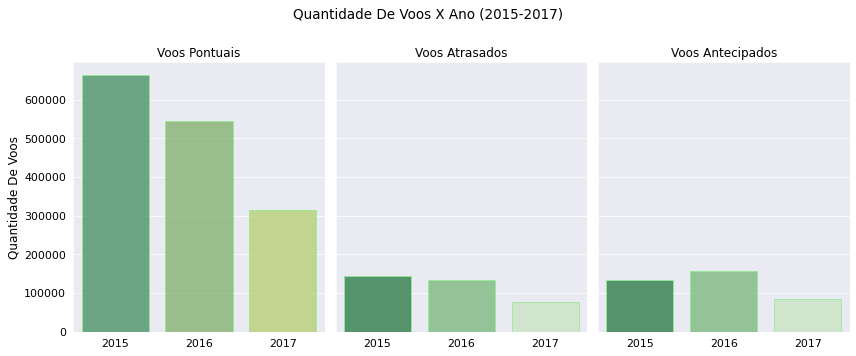

In [ ]:
# Gráfico de colunas com subplots para representar melhormente a quantidade de voos pontuais e atrasados por ano:
fig, ax = plt.subplots(1, 3, figsize = (12, 5), sharey = True)
sns.barplot(ax = ax[0], data = df_pont.groupby(df_pont.dt_part_prev.dt.year).agg({'voos':np.count_nonzero}
                                                                          ).reset_index().sort_values('voos', ascending = False),
            x = 'dt_part_prev', y = 'voos', alpha = 0.8, palette = 'summer', edgecolor = 'lightgreen')
sns.barplot(ax = ax[1], data = df_atras.groupby(df_atras.dt_part_prev.dt.year).agg({'voos':np.count_nonzero}
                                                                          ).reset_index().sort_values('voos', ascending = False),
            x = 'dt_part_prev', y = 'voos', alpha = 0.8, palette = 'Greens_r', edgecolor = 'lightgreen')
sns.barplot(ax = ax[2], data = df_ant.groupby(df_ant.dt_part_prev.dt.year).agg({'voos':np.count_nonzero}
                                                                               ).reset_index().sort_values('voos', ascending = False),
            x = 'dt_part_prev', y = 'voos', alpha = 0.8, palette = 'Greens_r', edgecolor = 'lightgreen')
fig.suptitle('Quantidade De Voos X Ano (2015-2017)', fontsize = 13.5, color = 'k')
ax[0].set_xlabel('')
ax[0].set_xticklabels([2015, 2016, 2017], fontsize = 11, color = 'k')
ax[0].set_ylabel('Quantidade De Voos', fontsize = 12, color = 'k')
ax[0].set_title('Voos Pontuais', fontsize = 12, color = 'k')
ax[1].set_xlabel('')
ax[1].set_xticklabels([2015, 2016, 2017], fontsize = 11, color = 'k')
ax[1].set_ylabel('')
ax[1].set_title('Voos Atrasados', fontsize = 12, color = 'k')
ax[2].set_xlabel('')
ax[2].set_ylabel('')
ax[2].set_xticklabels([2015, 2016, 2017], fontsize = 11, color = 'k')
ax[2].set_title('Voos Antecipados', fontsize = 12, color = 'k')
ax[0].set_yticklabels([0, 100000, 200000, 300000, 400000, 500000, 600000], fontsize = 11, color = 'k')
plt.tight_layout(rect = [0, 0, 1, 0.90])

#### 10 - Quais são os estados que mais se destacam?

In [ ]:
# Agrupamento dos estados com mais quantidade de voos (2015-2017): 
df_8 = df[df['uf_origem'] != 'N/I'].groupby('uf_origem').agg({'voos': np.count_nonzero}).reset_index().sort_values('voos', ascending = False)
print(df_8.shape)
df_8.head()

(27, 2)


,uf_origem,voos
25,SP,713500
18,RJ,257998
6,DF,190010
10,MG,187982
17,PR,138091


In [ ]:
# A porcentagem de voos por estado e acumulação de dados pelas dez linhas representa mais da metade dos dados (76%):
df_8['perc_voos'] = (df_8['voos'] / df.shape[0] * 100).round(2)
df_8['acumulado'] = df_8['perc_voos'].cumsum()
df_8.head(10)

,uf_origem,voos,perc_voos,acumulado
25,SP,713500,28.06,28.06
18,RJ,257998,10.15,38.21
6,DF,190010,7.47,45.68
10,MG,187982,7.39,53.07
17,PR,138091,5.43,58.50
4,BA,125766,4.95,63.45
22,RS,93723,3.69,67.14
15,PE,87805,3.45,70.59
13,PA,78692,3.10,73.69
23,SC,76416,3.01,76.70


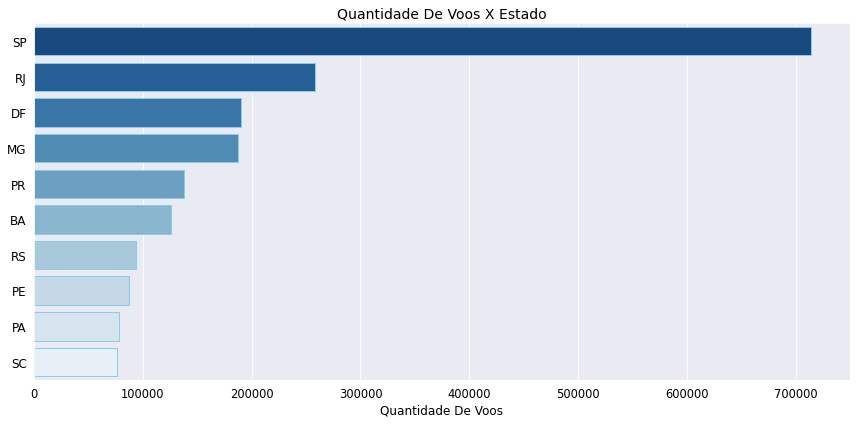

In [ ]:
ax = sns.barplot(
    x = 'voos',
    y = 'uf_origem',
    data = df_8.head(10),
    alpha = 1,
    palette = 'Blues_r',
    edgecolor = 'skyblue'
)
ax.figure.set_size_inches(12, 6)
ax.set_xlabel('Quantidade De Voos', fontsize = 12, color = 'k')
ax.set_ylabel('')
ax.set_yticklabels(labels = df_8.uf_origem[:10].to_list(), fontsize = 12, color = 'k')
ax.set_title('Quantidade De Voos X Estado', fontsize = 14, color = 'k')
ax.set_xticklabels([0, 100000, 200000, 300000, 400000, 500000, 600000, 700000], 
                   fontsize = 11.5, color = 'k')
plt.tight_layout();

In [ ]:
# Atribuição à uma nova variável somente os estados de origens dos voos que foram identificados:
df_1 = df[df['uf_origem'] != 'N/I']
print('Dataframe original: ', df.shape)
print('\n')
print('Dataframe com os estados de origem identificados: ', df_1.shape)

Dataframe original:  (2542515, 21)


Dataframe com os estados de origem identificados:  (2382836, 21)


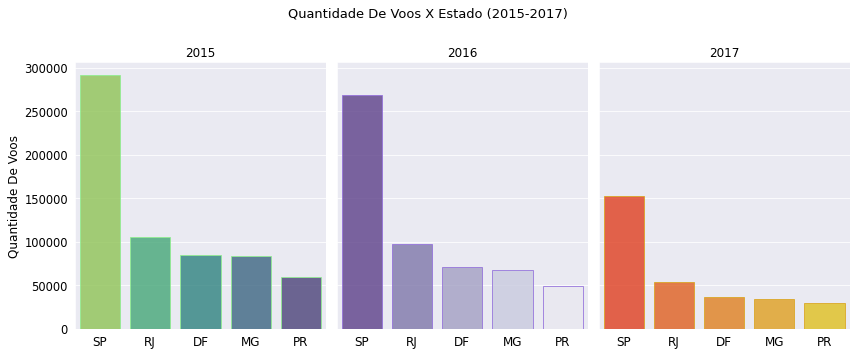

In [ ]:
# Gráficos de colunas para representar visualmente a quantidade de voos por estado à cada ano:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 5), sharey = True)
sns.barplot(ax = ax[0],
            data = df_1[df_1['dt_part_prev'].dt.year == 2015].groupby('uf_origem').agg({'voos':np.count_nonzero}).reset_index().sort_values('voos',
                                                                                                                     ascending = False).head(5),
            x = 'uf_origem',
            y = 'voos',
            alpha = 0.8,
            palette = 'viridis_r',
            edgecolor = 'lightgreen')
sns.barplot(ax = ax[1], 
            data = df_1[df_1['dt_part_prev'].dt.year == 2016].groupby('uf_origem').agg({'voos':np.count_nonzero}).reset_index().sort_values('voos',
                                                                                                                     ascending = False).head(5),
            x = 'uf_origem',
            y = 'voos',
            alpha = 0.8,
            palette = 'Purples_r',
            edgecolor = 'mediumpurple')
sns.barplot(ax = ax[2], 
            data = df_1[df_1['dt_part_prev'].dt.year == 2017].groupby('uf_origem').agg({'voos':np.count_nonzero}).reset_index().sort_values('voos',
                                                                                                                     ascending = False).head(5),
            x = 'uf_origem',
            y = 'voos',
            alpha = 0.8,
            palette = 'autumn',
            edgecolor = 'goldenrod')
ax[0].set_ylabel('Quantidade De Voos', fontsize = 12, color = 'k')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')
fig.suptitle('Quantidade De Voos X Estado (2015-2017)', fontsize = 13, color = 'k', )
ax[0].set_title('2015', fontsize = 12, color = 'k')
ax[1].set_title('2016', fontsize = 12, color = 'k')
ax[2].set_title('2017', fontsize = 12, color = 'k')
ax[0].set_xticklabels(labels = df_8.uf_origem[:5].to_list(), fontsize = 12, color = 'k')
ax[1].set_xticklabels(labels = df_8.uf_origem[:5].to_list(), fontsize = 12, color = 'k')
ax[2].set_xticklabels(labels = df_8.uf_origem[:5].to_list(), fontsize = 12, color = 'k')
ax[0].set_yticklabels([0, 50000, 100000, 150000, 200000, 250000, 300000], fontsize = 11.5, color = 'k')
plt.tight_layout(rect = [0, 0, 1, 0.90]);

#### 11 - Quais são as principais justificativas do cancelamento de voos?

In [ ]:
# Principais justificativas do cancelamento de voos:
(df[df['situacao'] == 0].justificativa.value_counts(normalize = True) * 100).round(2).head(5)

CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS                                         51.74
AUTORIZADO                                                                               37.39
FALTA PAX COM PASSAGEM MARCADA - ( APENAS PARA AS LINHAS AEREAS DOMESTICAS REGIONAIS)     2.82
CANCELAMENTO - AEROPORTO DESTINO ABAIXO LIMITES                                           2.12
PROGRAMADO - FERIADO NACIONAL                                                             1.81
Name: justificativa, dtype: float64

# Análise exploratória de dados encerrada.